In [1]:
import os
import glob

video_files = ["sample-covid.mp4", "sample-ncovid.mp4", "sample-smooth-pulm-edema.mp4"]
video_file = video_files[0]
video_name = os.path.splitext(video_file)[0]

if not os.path.exists(video_name):
    !mkdir $video_name
    !ffmpeg -i $video_file -f image2 "$video_name/video-frame%05d.png"

files = glob.glob(video_name+'/*.png')

files.sort()
print(type(files))
#print(files)  

<class 'list'>


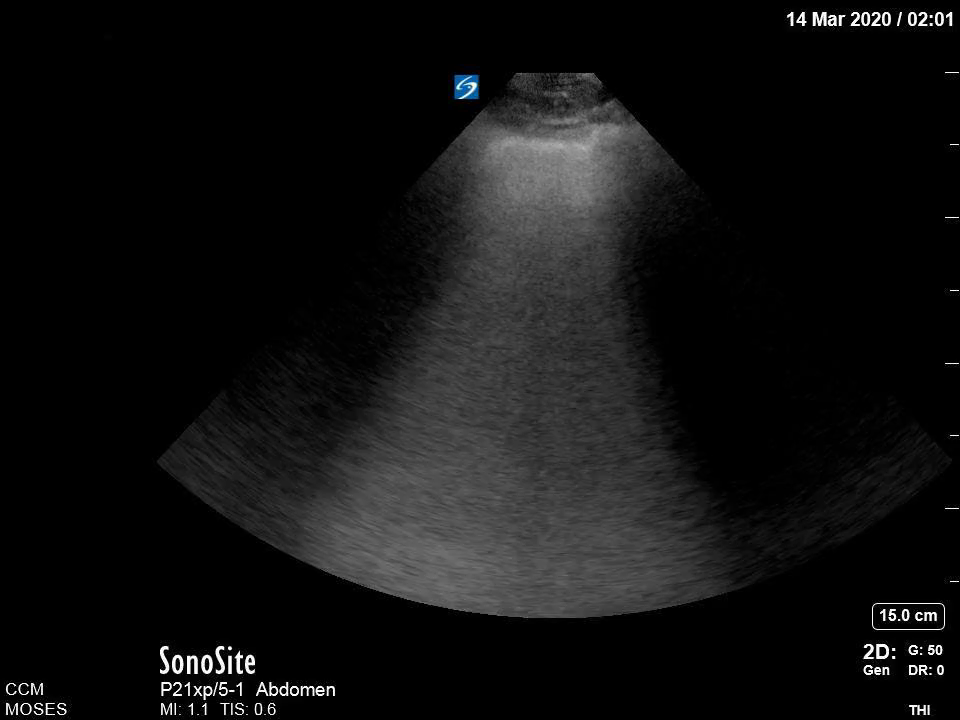

done


In [2]:
from skimage import data, io, filters
import matplotlib.pyplot as plt
from IPython.display import display, Image
import PIL
import time

image_path = files[1]
image = io.imread(image_path)
display(PIL.Image.fromarray(image))
display(data=image)

print('done')

In [4]:
'''
for image_path in files:
    image = io.imread(image_path)
    display(PIL.Image.fromarray(image))
    time.sleep(0.33)
'''

'\nfor image_path in files:\n    image = io.imread(image_path)\n    display(PIL.Image.fromarray(image))\n    time.sleep(0.33)\n'

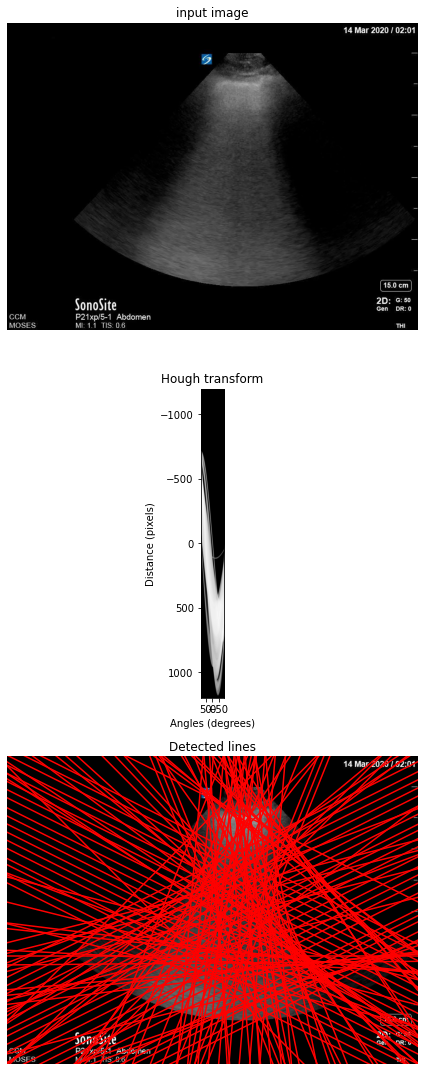

In [13]:
import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from matplotlib import cm

tested_angles = np.linspace(-np.pi/2, np.pi/2, 360)
h, theta, d = hough_line(rgb2gray(image), theta=tested_angles)

fig, axes = plt.subplots(3,1,figsize=(6,15))
ax = axes.ravel()

ax[0].imshow(image,cmap=cm.gray)
ax[0].set_title("input image")
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
origin = np.array((0, image.shape[1]))
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-r')
ax[2].set_xlim(origin)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()


NameError: name 'hough_line' is not defined